In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
import librosa.display
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import os
from glob import glob
from IPython.display import Audio, display
from google.colab import drive
import pickle
import math
import statistics
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
diagnosis = pd.read_csv('/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/simple_extracted_features_df.csv')
diagnosis.head(10)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Disease_Id
0,-350.29517,97.178185,77.049090,56.454502,39.910183,28.304533,21.135487,17.349165,15.320764,13.873403,...,0.879285,0.744374,0.700323,0.718066,0.826544,0.943023,1.035765,1.065833,1.019794,0
1,-299.68030,127.897170,46.587223,27.426277,32.336710,29.447641,21.253862,14.247361,12.528389,14.088763,...,2.358721,2.173096,1.178458,1.052596,1.967756,2.719148,1.436073,-0.696693,-0.208386,0
2,-388.23462,104.584790,50.404076,44.282290,31.175829,28.736917,21.662169,19.746120,14.553826,13.583982,...,3.014789,2.475592,2.764455,2.241044,2.680442,2.247488,2.467751,1.392687,1.745624,0
3,-277.74405,147.344850,55.125916,24.791193,31.462868,30.049180,18.900990,10.995044,10.040893,12.667876,...,3.632589,2.879391,1.270702,1.160187,2.072255,2.044492,0.335398,-1.183670,-0.284111,0
4,-363.61035,90.640335,73.752520,55.409008,39.732200,28.729020,22.285254,18.880713,16.886374,15.181063,...,1.400367,1.354774,1.291005,1.281866,1.290259,1.201254,1.036850,0.921921,0.876532,0
5,-360.86325,102.220245,67.593575,39.784485,28.795162,27.439722,26.277983,23.423965,20.890108,18.728674,...,1.391534,1.552292,1.611543,1.939141,2.431807,2.258177,1.245255,0.525179,0.996008,0
6,-355.39500,112.536160,64.790840,33.579277,25.136017,25.041494,23.030697,19.210463,16.588993,15.439405,...,2.040742,1.648266,1.218748,1.499158,2.073046,1.783763,0.731253,0.222640,0.768277,0
7,-376.41180,111.501860,55.455875,48.383890,31.655716,26.167261,17.675451,14.943842,10.174037,9.339270,...,2.476558,1.523863,1.796576,1.418989,1.623340,1.210590,1.925386,0.878168,1.273263,0
8,-378.65372,109.177150,54.129740,48.417164,31.715292,26.969416,17.627798,15.190967,9.436680,8.876279,...,2.453577,1.256260,2.403614,1.318032,2.135132,1.600577,2.418514,0.935733,1.708688,0
9,-290.52972,144.067340,56.584170,26.495031,31.385927,30.363302,18.428387,8.903918,9.643349,14.604653,...,3.872808,3.803702,1.627501,0.697510,2.000557,2.940198,0.730080,-1.920927,-0.681654,0


In [ ]:
diagnosis['Disease_Id'].value_counts()

0    793
4     37
1     35
2     23
3     16
5     13
7      2
6      1
Name: Disease_Id, dtype: int64

In [ ]:
data = diagnosis.values

In [ ]:
data = np.delete(data, np.where((data[:, -1] == 6) | (data[:, -1] == 7))[0], axis=0)

In [ ]:
X, y = data[:, :-1], data[:, -1]

In [ ]:
X.shape

(917, 40)

In [ ]:
y.shape

(917,)

In [ ]:
dict1 = {0:"COPD", 1:"Healthy", 2:"URTI", 3:"Bronchiectasis", 4:"Pneumoina", 5:"Bronchiolitis"}

In [ ]:
from collections import Counter
counter = Counter(y)

In [ ]:
counter.items()

dict_items([(0.0, 793), (5.0, 13), (2.0, 23), (3.0, 16), (1.0, 35), (4.0, 37)])

Class=0.0, n=793 (86.478%)
Class=5.0, n=13 (1.418%)
Class=2.0, n=23 (2.508%)
Class=3.0, n=16 (1.745%)
Class=1.0, n=35 (3.817%)
Class=4.0, n=37 (4.035%)


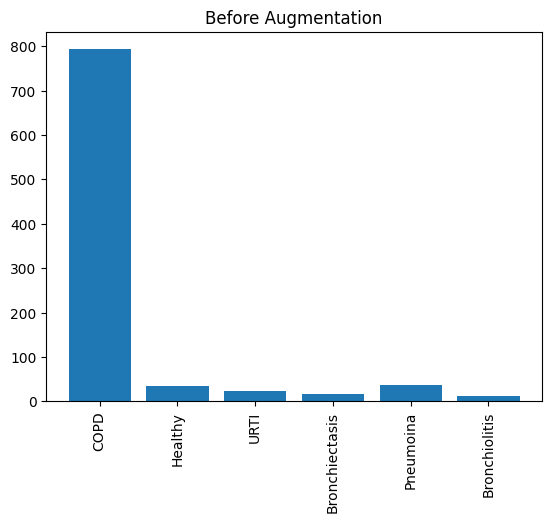

In [ ]:
l = []
for i in counter.keys():
  l.append(int(i))

l1 = []
for i in l:
  l1.append(dict1[i])

for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.xticks(l, l1, rotation ='vertical')
plt.title("Before Augmentation")
plt.bar(counter.keys(), counter.values())
plt.show()

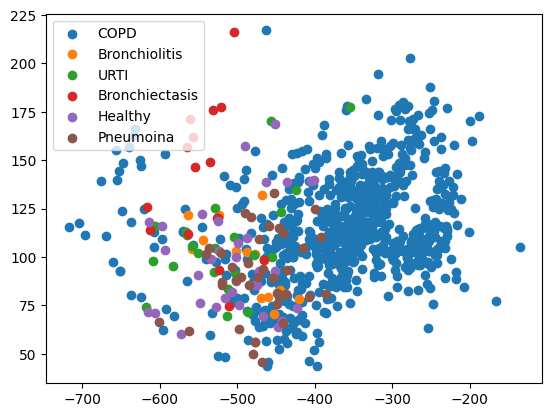

In [ ]:
from numpy import where
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 plt.scatter(X[row_ix, 0], X[row_ix, 1], label=dict1[label])
plt.legend()
plt.show()

In [ ]:
audio_dataset_path='/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/'
data=pd.read_csv('/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/patient_diagnosis.csv')

In [ ]:
files=glob('/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/*.wav')

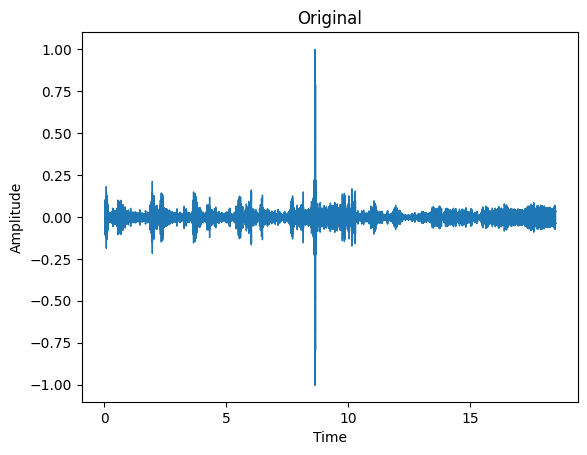

<Figure size 1200x400 with 0 Axes>

In [ ]:
data_x, sampling_rate = librosa.load(files[0])
librosa.display.waveshow(y=data_x, sr=sampling_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Original")
plt.figure(figsize=(12, 4))
plt.show()

In [ ]:
import numpy as np
def manipulate(data, noise_factor):
    noise = np.random.randn(len(data))
    augmented_data = data + noise_factor * noise
    # Cast back to same data type
    augmented_data = augmented_data.astype(type(data[0]))
    return augmented_data

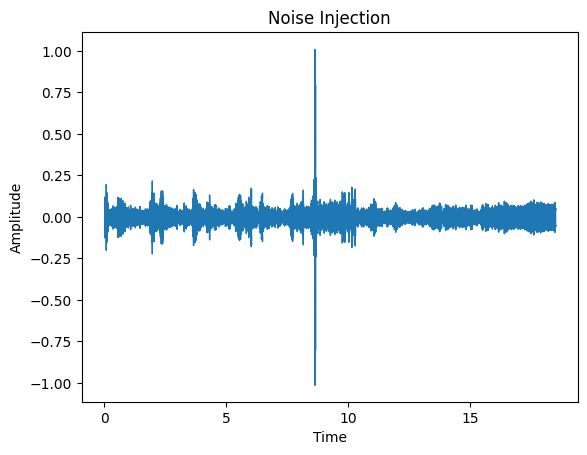

<Figure size 1200x400 with 0 Axes>

In [ ]:
y = manipulate(data_x, 0.008)
librosa.display.waveshow(y=y, sr=sampling_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Noise Injection")
plt.figure(figsize=(12, 4))
plt.show()

In [ ]:
def manipulate1(data,x):
    return np.roll(data, x)

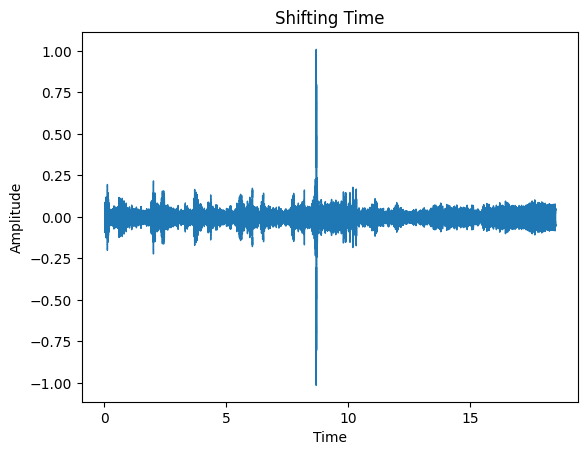

<Figure size 1200x400 with 0 Axes>

In [ ]:
y = manipulate1(y, 1000)
librosa.display.waveshow(y=y, sr=sampling_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Shifting Time")
plt.figure(figsize=(12, 4))
plt.show()

In [ ]:
def manipulate2(data,sampling_rate,shift_direction,shift_max=1):
    shift = np.random.randint(sampling_rate * shift_max)
    # shift_max = np.random.randint(0.1,1)
    # print(shift_max)
    print(shift)
    if shift_direction == 'right':
        shift = -shift
    elif self.shift_direction == 'both':
        direction = np.random.randint(0, 2)
        if direction == 1:
            shift = -shift
    augmented_data = np.roll(data, shift)
    # Set to silence for heading/ tailing
    if shift > 0:
        augmented_data[:shift] = 0
    else:
        augmented_data[shift:] = 0
    return augmented_data

19379


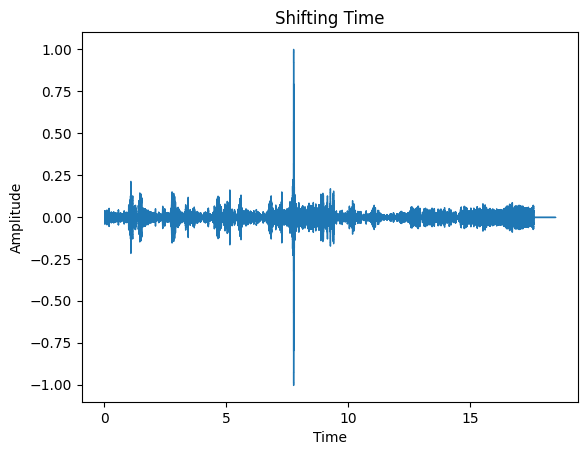

<Figure size 1200x400 with 0 Axes>

In [ ]:
y = manipulate2(data_x,22050,'right',1)
librosa.display.waveshow(y=y, sr=sampling_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Shifting Time")
plt.figure(figsize=(12, 4))
plt.show()

1.3


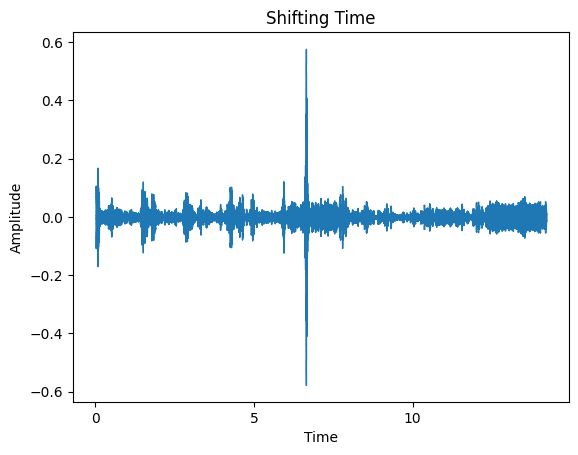

<Figure size 1200x400 with 0 Axes>

In [ ]:
rate = round(np.random.uniform(0.5,2.0)*1,1)
while rate == 1.0:
    rate = round(np.random.uniform(0.5,2.0)*1,1)
print(rate)
data_stretch = librosa.effects.time_stretch(y=data_x, rate=rate)

librosa.display.waveshow(y=data_stretch, sr=sampling_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Shifting Time")
plt.figure(figsize=(12, 4))
plt.show()

In [ ]:
def add_noise(data, noise_factor):
    noise = np.random.randn(len(data))
    augmented_data = data + noise_factor * noise
    # Cast back to same data type
    augmented_data = augmented_data.astype(type(data[0]))
    return augmented_data


def shift(data,sampling_rate,shift_direction,shift_max=1):
    shift = np.random.randint(sampling_rate * shift_max)
    # shift_max = np.random.randint(0.1,1)
    # print(shift_max)
    # print(shift)
    if shift_direction == 'right':
        shift = -shift
    elif self.shift_direction == 'both':
        direction = np.random.randint(0, 2)
        if direction == 1:
            shift = -shift
    augmented_data = np.roll(data, shift)
    # Set to silence for heading/ tailing
    if shift > 0:
        augmented_data[:shift] = 0
    else:
        augmented_data[shift:] = 0
    return augmented_data


In [ ]:
from tqdm import tqdm
'''
  Extract feature from the Sound data. We extracted Mel-frequency cepstral coefficients( spectral
  features ), from the audio data. Augmentation of sound data by adding Noise, streaching and shifting
  is also implemented here. 40 features are extracted from each audio data and used to train the model.
  Args:
      dir_: Input directory to the Sound input file.
  Returns:
      X_: Array of features extracted from the sound file.
      y_: Array of target Labels.
'''
X_=[]
y_=[]
COPD=[]
copd_count=0
for soundDir in tqdm((os.listdir(audio_dataset_path))):
    if soundDir[-3:]=='wav':
      #data_x, sampling_rate = librosa.load(dir_+soundDir,res_type='kaiser_fast')
        #mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=40).T,axis=0)
        #X_.append(mfccs)
        #y_.append(list(data[data['patient_id']==int(soundDir[:3])]['disease'])[0])

        p = list(data[data['patient_Id']==int(soundDir[:3])]['Disease'])[0]
        if (p=='COPD') and copd_count<=550:
            if (soundDir[:3] in COPD):
                data_x, sampling_rate = librosa.load(audio_dataset_path+soundDir)
                # 40 features are extracted from each audio data and used to train the model.
                mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=40).T,axis=0)
                COPD.append(soundDir[:3])
                copd_count+=1
                X_.append(mfccs)
                y_.append(list(data[data['patient_Id']==int(soundDir[:3])]['Disease'])[0])
            if (soundDir[:3] not in COPD) and copd_count<=591:
                data_x, sampling_rate = librosa.load(audio_dataset_path+soundDir)
                mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=40).T,axis=0)
                COPD.append(soundDir[:3])
                copd_count+=1
                X_.append(mfccs)
                y_.append(list(data[data['patient_Id']==int(soundDir[:3])]['Disease'])[0])

        if (p!='COPD'):
            if(p == 'Healthy'):
              data_x, sampling_rate = librosa.load(audio_dataset_path+soundDir)
              mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=40).T,axis=0)
              X_.append(mfccs)
              y_.append(list(data[data['patient_Id']==int(soundDir[:3])]['Disease'])[0])
              for i in range(0,5):
                data_noise = add_noise(data_x,0.008)
                mfccs_noise = np.mean(librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=40).T,axis=0)
                X_.append(mfccs_noise)
                y_.append(p)

                data_shift = shift(data_x,22050,'right',1)
                mfccs_shift = np.mean(librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=40).T,axis=0)
                X_.append(mfccs_shift)
                y_.append(p)

                rate = round(np.random.uniform(0.5,2.0)*1,1)
                while rate == 1.0:
                    rate = round(np.random.uniform(0.5,2.0)*1,1)
                data_stretch = librosa.effects.time_stretch(y=data_x, rate=rate)
                mfccs_stretch = np.mean(librosa.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=40).T,axis=0)
                X_.append(mfccs_stretch)
                y_.append(p)
            elif(p == 'URTI'):
              data_x, sampling_rate = librosa.load(audio_dataset_path+soundDir)
              mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=40).T,axis=0)
              X_.append(mfccs)
              y_.append(list(data[data['patient_Id']==int(soundDir[:3])]['Disease'])[0])
              for i in range(0,7):
                data_noise = add_noise(data_x,0.008)
                mfccs_noise = np.mean(librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=40).T,axis=0)
                X_.append(mfccs_noise)
                y_.append(p)

                data_shift = shift(data_x,22050,'right',1)
                mfccs_shift = np.mean(librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=40).T,axis=0)
                X_.append(mfccs_shift)
                y_.append(p)

                rate = round(np.random.uniform(0.5,2.0)*1,1)
                while rate == 1.0:
                    rate = round(np.random.uniform(0.5,2.0)*1,1)
                data_stretch = librosa.effects.time_stretch(y=data_x, rate=rate)
                mfccs_stretch = np.mean(librosa.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=40).T,axis=0)
                X_.append(mfccs_stretch)
                y_.append(p)
            elif(p == 'Bronchiectasis'):
              data_x, sampling_rate = librosa.load(audio_dataset_path+soundDir)
              mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=40).T,axis=0)
              X_.append(mfccs)
              y_.append(list(data[data['patient_Id']==int(soundDir[:3])]['Disease'])[0])
              for i in range(0,11):
                data_noise = add_noise(data_x,0.008)
                mfccs_noise = np.mean(librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=40).T,axis=0)
                X_.append(mfccs_noise)
                y_.append(p)

                data_shift = shift(data_x,22050,'right',1)
                mfccs_shift = np.mean(librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=40).T,axis=0)
                X_.append(mfccs_shift)
                y_.append(p)

                rate = round(np.random.uniform(0.5,2.0)*1,1)
                while rate == 1.0:
                    rate = round(np.random.uniform(0.5,2.0)*1,1)
                data_stretch = librosa.effects.time_stretch(y=data_x, rate=rate)
                mfccs_stretch = np.mean(librosa.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=40).T,axis=0)
                X_.append(mfccs_stretch)
                y_.append(p)
            elif(p == 'Pneumonia'):
              data_x, sampling_rate = librosa.load(audio_dataset_path+soundDir)
              mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=40).T,axis=0)
              X_.append(mfccs)
              y_.append(list(data[data['patient_Id']==int(soundDir[:3])]['Disease'])[0])
              for i in range(0,4):
                data_noise = add_noise(data_x,0.008)
                mfccs_noise = np.mean(librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=40).T,axis=0)
                X_.append(mfccs_noise)
                y_.append(p)

                data_shift = shift(data_x,22050,'right',1)
                mfccs_shift = np.mean(librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=40).T,axis=0)
                X_.append(mfccs_shift)
                y_.append(p)

                rate = round(np.random.uniform(0.5,2.0)*1,1)
                while rate == 1.0:
                    rate = round(np.random.uniform(0.5,2.0)*1,1)
                data_stretch = librosa.effects.time_stretch(y=data_x, rate=rate)
                mfccs_stretch = np.mean(librosa.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=40).T,axis=0)
                X_.append(mfccs_stretch)
                y_.append(p)
            elif(p == 'Bronchiolitis'):
              data_x, sampling_rate = librosa.load(audio_dataset_path+soundDir)
              mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=40).T,axis=0)
              X_.append(mfccs)
              y_.append(list(data[data['patient_Id']==int(soundDir[:3])]['Disease'])[0])
              for i in range(0,13):
                data_noise = add_noise(data_x,0.008)
                mfccs_noise = np.mean(librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=40).T,axis=0)
                X_.append(mfccs_noise)
                y_.append(p)

                data_shift = shift(data_x,22050,'right',1)
                mfccs_shift = np.mean(librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=40).T,axis=0)
                X_.append(mfccs_shift)
                y_.append(p)

                rate = round(np.random.uniform(0.5,2.0)*1,1)
                while rate == 1.0:
                    rate = round(np.random.uniform(0.5,2.0)*1,1)
                data_stretch = librosa.effects.time_stretch(y=data_x, rate=rate)
                mfccs_stretch = np.mean(librosa.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=40).T,axis=0)
                X_.append(mfccs_stretch)
                y_.append(p)

            # data_x, sampling_rate = librosa.load(audio_dataset_path+soundDir)
            # mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=40).T,axis=0)
            # X_.append(mfccs)
            # y_.append(list(data[data['patient_Id']==int(soundDir[:3])]['Disease'])[0])

            # data_noise = add_noise(data_x,0.005)
            # mfccs_noise = np.mean(librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=40).T,axis=0)
            # X_.append(mfccs_noise)
            # y_.append(p)

            # data_shift = shift(data_x,1600)
            # mfccs_shift = np.mean(librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=40).T,axis=0)
            # X_.append(mfccs_shift)
            # y_.append(p)

            # data_stretch = librosa.effects.time_stretch(y=data_x, rate=1.2)
            # mfccs_stretch = np.mean(librosa.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=40).T,axis=0)
            # X_.append(mfccs_stretch)
            # y_.append(p)

            # data_stretch_2 = librosa.effects.time_stretch(y=data_x, rate=0.8)
            # mfccs_stretch_2 = np.mean(librosa.feature.mfcc(y=data_stretch_2, sr=sampling_rate, n_mfcc=40).T,axis=0)
            # X_.append(mfccs_stretch_2)
            # y_.append(p)

X_ = np.array(X_)
y_ = np.array(y_)


100%|██████████| 920/920 [07:30<00:00,  2.04it/s]


In [ ]:
df = pd.DataFrame(X_)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-477.403412,67.018898,54.495525,39.221470,26.022156,17.418203,13.355597,12.385004,12.951959,13.972430,...,0.316570,0.905445,1.828418,2.753478,3.402586,3.664344,3.583195,3.262911,2.790702,2.233784
1,-456.245300,86.772209,66.549393,43.219105,24.172537,11.904998,5.613225,4.082992,6.394209,10.865974,...,0.947520,1.224815,1.710074,2.220140,2.707141,3.132681,3.371336,3.301630,2.959306,2.530368
2,-528.425232,104.517365,69.907585,42.572124,31.213381,27.490576,22.207005,16.551100,15.276700,16.680300,...,2.385143,1.706840,1.291596,1.235050,1.438685,1.699789,1.756031,1.701586,1.754641,1.924429
3,-255.640625,18.096684,20.870960,20.051090,18.711037,17.050531,15.497256,14.303628,12.963915,11.681453,...,1.973758,1.793609,1.637177,1.725999,1.765679,1.852187,1.919738,1.736541,1.801463,1.871822
4,-529.429688,104.600891,69.621445,42.210793,31.043596,27.443840,22.173733,16.461601,15.227236,16.656986,...,2.369729,1.697542,1.272352,1.194061,1.393959,1.668183,1.744319,1.685940,1.729068,1.891513


In [ ]:
list_1 = y_.tolist()

In [ ]:
labels = []
to_hot_one = {"COPD":0, "Healthy":1, "URTI":2, "Bronchiectasis":3, "Pneumonia":4, "Bronchiolitis":5, "Asthma":6, "LRTI":7}
for i in list_1:
  labels.append(to_hot_one[i])

In [ ]:
df['Disease_Id'] = labels

In [ ]:
df['Disease_Id'].value_counts()

1    560
0    551
3    544
5    520
2    506
4    481
Name: Disease_Id, dtype: int64

In [ ]:
df.to_csv('augmented_features_df_2.csv', index = False)

In [ ]:
aug_diagnosis = pd.read_csv('/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/augmented_features_df_2.csv')
aug_diagnosis.head(10)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Disease_Id
0,-477.40340,67.018900,54.495525,39.221470,26.022156,17.418203,13.355597,12.385004,12.951959,13.972430,...,0.905445,1.828418,2.753478,3.402586,3.664344,3.583195,3.262911,2.790702,2.233784,0
1,-456.24530,86.772210,66.549390,43.219105,24.172537,11.904998,5.613225,4.082992,6.394209,10.865974,...,1.224814,1.710074,2.220140,2.707141,3.132681,3.371336,3.301630,2.959306,2.530368,0
2,-528.42523,104.517365,69.907585,42.572124,31.213380,27.490576,22.207005,16.551100,15.276700,16.680300,...,1.706840,1.291596,1.235050,1.438685,1.699789,1.756031,1.701586,1.754641,1.924429,2
3,-255.64062,18.096684,20.870960,20.051090,18.711037,17.050531,15.497256,14.303628,12.963915,11.681453,...,1.793608,1.637177,1.725999,1.765679,1.852187,1.919738,1.736541,1.801463,1.871822,2
4,-529.42970,104.600890,69.621445,42.210793,31.043596,27.443840,22.173733,16.461601,15.227236,16.656986,...,1.697542,1.272352,1.194061,1.393959,1.668183,1.744319,1.685940,1.729068,1.891513,2
5,-571.13730,117.958020,74.965780,43.933464,33.806370,31.284758,24.408092,16.717770,15.529688,18.265293,...,0.627224,0.259396,0.271418,0.575378,0.899926,0.968112,0.999029,1.224873,1.457944,2
6,-255.89860,17.742256,20.867315,20.220146,18.734290,17.119724,15.688530,14.316114,12.993207,11.825830,...,1.876012,1.749625,1.762875,2.009423,1.787552,1.701432,1.756789,1.620913,1.750492,2
7,-531.22800,104.532010,69.212420,41.669636,30.712978,27.322094,22.042282,16.244032,15.031177,16.554142,...,1.692670,1.264565,1.173141,1.368715,1.648205,1.722063,1.652701,1.701931,1.886006,2
8,-549.33545,98.781190,69.696594,45.893684,34.355186,29.032782,23.178514,17.695550,15.973738,16.517302,...,1.046319,0.823802,0.898577,1.049228,1.145125,1.222830,1.391525,1.559255,1.603436,2
9,-255.57726,17.958889,20.669990,20.054398,18.891289,17.261463,15.561161,14.110666,13.068844,11.947784,...,2.017830,1.645920,1.677412,1.811468,1.479625,1.727162,1.619632,1.627071,1.753640,2


In [ ]:
data = aug_diagnosis.values

In [ ]:
X, y = data[:, :-1], data[:, -1]

In [ ]:
from collections import Counter
counter = Counter(y)

Class=0.0, n=551 (17.426%)
Class=2.0, n=506 (16.003%)
Class=1.0, n=560 (17.710%)
Class=3.0, n=544 (17.204%)
Class=4.0, n=481 (15.212%)
Class=5.0, n=520 (16.445%)


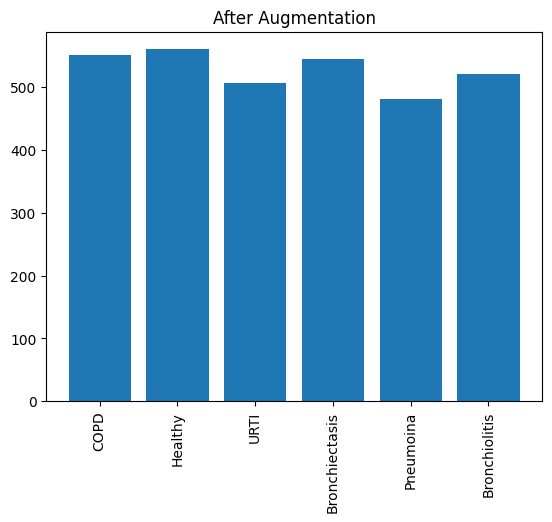

In [ ]:
l = []
for i in counter.keys():
  l.append(int(i))

l1 = []
for i in l:
  l1.append(dict1[i])

for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.xticks(l, l1, rotation ='vertical')
plt.title("After Augmentation")
plt.bar(counter.keys(), counter.values())
plt.show()

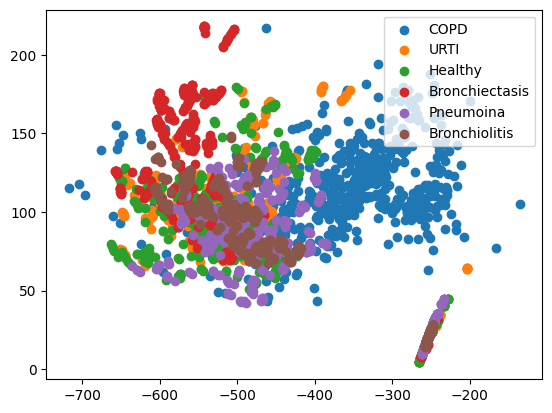

In [ ]:
from numpy import where
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 plt.scatter(X[row_ix, 0], X[row_ix, 1], label=dict1[label])
plt.legend()
plt.show()